In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import hmean
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 患者の情報と、その感情が心臓病を患っているかどうかのデータ(kaggleのデータ)
df = pd.read_csv("heart_preprocessed.csv")
y_col = "target"
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築(データの前処理後のcsvファイルを持ちている)
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

# precision, recall, thresholdの値を取得
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

# F値の取得
f1_score = [hmean([p, r])  for p, r in zip(precision, recall)]


## Threshold vs Precision, Recall, F-Score

89th threshold(=0.44) is the highest f1 score = 0.86


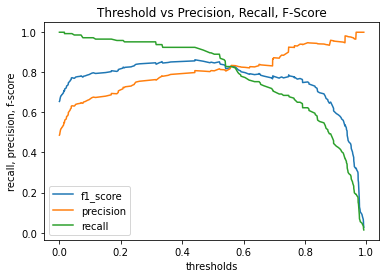

In [19]:
# thresholdsの長さを合わせる必要があるので注意(f1_scoreの最後の要素は使わない)
plt.plot(thresholds, f1_score[:-1], label="f1_score")
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.xlabel("thresholds")
plt.ylabel("recall, precision, f-score")
plt.title("Threshold vs Precision, Recall, F-Score")
plt.legend()

max_f1_idx = np.argmax(f1_score)
print(f"{max_f1_idx}th threshold(={thresholds[max_f1_idx]:.2f}) is the highest f1 score = {f1_score[max_f1_idx]:.2f}")
# :.2f をつけることで小数点第二位までの表示にとどめている